In [54]:
import warnings

warnings.filterwarnings("ignore")

import os
hf = r'../outputs/4.3_students_experiences/'
os.makedirs(hf, exist_ok=True)

# 4.3 Student Experiences

The student experience of finding accommodation clearly demonstrates the difficulties and problems faced by the most vulnerable groups during the ongoing housing crisis. In order to better understand the students, individual interviews were conducted, where open-ended questions were asked to guide the storytelling. 

These problems and difficulties need to be analysed before proposing ways to resolve the student housing crisis, as they serve as barriers between student accommodation and users. 

## Set Up

Import Libraries

In [55]:
import pandas as pd
import geopandas as gpd
import chardet
import gspread
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from pywaffle import Waffle
import numpy as np
from matplotlib.patches import Patch
from math import pi

Colors 

In [56]:
from matplotlib.colors import LinearSegmentedColormap

colors= ["#FFE5D9", "#FFD7BA", "#FEC89A", "#FFB78F", "#F49F7D", "#F28B6D", "#E1755CFF"]

Font

In [57]:
plt.rcParams["font.family"] = "Helvetica"

Scripts

In [58]:
import pandas as pd          
import matplotlib.pyplot as plt  

def plot_pie_chart(column_name, title=None):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame")
        return
    
    # Count values and prepare data
    value_counts = df[column_name].value_counts()
    total = value_counts.sum()
    

    # Custom function to show count and percentage
    def make_autopct(values):
        def my_autopct(pct):
            count = int(round(pct * total / 100.0))
            return f"{pct:.1f}%\n[{count}]"
        return my_autopct

    # Create pie chart
    plt.figure(figsize=(8, 8))
    patches, texts, autotexts = plt.pie(
        value_counts,
        labels=value_counts.index,
        colors=colors[:len(value_counts)],
        autopct=make_autopct(value_counts),
        startangle=90,
        textprops={'fontsize': 12}
    )
    
    # Equal aspect ratio ensures pie is drawn as circle
    plt.axis('equal')  
    
    # Set title (use column name if no custom title provided)
    if not title:
        title = f"Distribution of {column_name}"
    plt.title(title, fontsize=14, pad=20, weight='bold')
    
    # Improve label readability
    plt.setp(texts, size=12)
    plt.setp(autotexts, size=10, color='black')
    
    plt.tight_layout()

    plt.savefig(os.path.join(hf, f"{column_name}_pie_chart.png"))

    plt.show()


In [59]:
import pandas as pd          
import matplotlib.pyplot as plt  

def plot_bar_chart(column_name, title=None, rotate_labels=True):
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame")
        return

    value_counts = df[column_name].value_counts()
    total = value_counts.sum()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(value_counts.index,
                   value_counts.values,
                   color=colors[:len(value_counts)])

    # add 15 % breathing room above tallest bar
    plt.ylim(0, value_counts.max() * 1.15)

    # annotate bars
    for bar, value in zip(bars, value_counts.values):
        pct = 100 * value / total
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() + value_counts.max() * 0.02,  # a little above the bar
                 f"{pct:.1f}%\n[{value}]",
                 ha='center', va='bottom', fontsize=10)

    if not title:
        title = f"Distribution of {column_name}"
    plt.title(title, fontsize=14, pad=15, weight='bold')
    plt.ylabel("Count")

    if rotate_labels:
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    # Save the figure
    plt.savefig(os.path.join(hf, f"{column_name}_bar_chart.png"))

    plt.show()

Data Import

In [60]:
fp = r"../inputs/4.3_students_experiences/user_data.xlsx" 

df = pd.read_excel(fp)

# Difficulties and Problems

## Too Much Competition

One of the most frequently mentioned problems when looking for accommodation is excessive competition, which permeates all segments of the student rental market. Virtually all respondents describe a situation in which the number of applicants significantly exceeds the available supply, especially in the budget segment. Even when actively submitting applications, students rarely receive responses, and scheduled viewings are often cancelled at the last minute. As one participant noted: `The worse problem is competition. I wrote people and even arranged meetings, but they did not respond and cancelled meetings because they rented the place already to another person`. In such a competitive environment, time becomes a critical factor — a delay of even a few hours can mean losing an opportunity: `You had to apply very quickly, or you'd be too late`.

## Stress

Due to excessive competition, 55.3% of student housing users experience stress levels above 8 points. Similar to the high demand–capacity pressure indicators recorded in the spatial analysis, high stress levels reflect not only a structural shortage of student housing, but also a combination of related difficulties, including uncertainty, temporary solutions, and emotional costs associated with the housing search process.

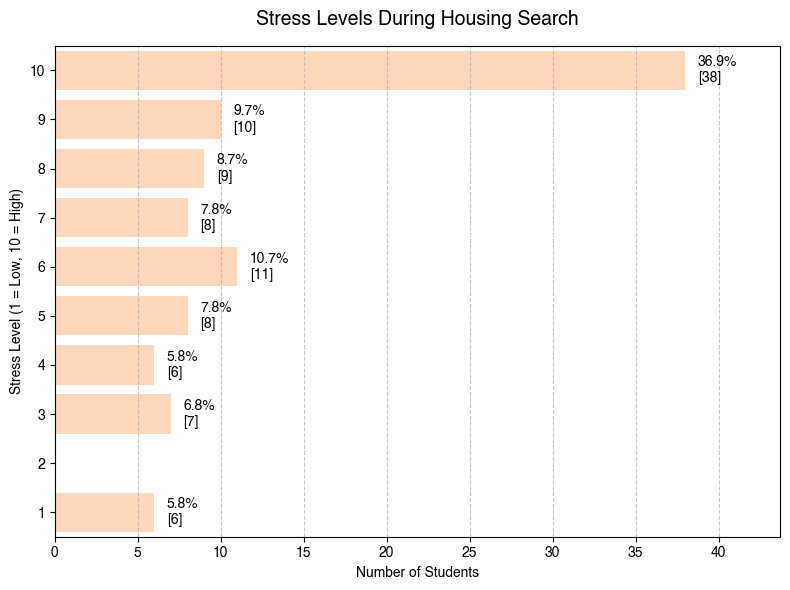

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

stress_levels = range(1, 11)
value_counts = df['stress'].value_counts().reindex(stress_levels, fill_value=0)
total = value_counts.sum()

color = ["#FFD7BA"] * len(value_counts)

plt.figure(figsize=(8, 6))
bars = plt.barh(value_counts.index, 
                value_counts.values,
                color=color)

# Force y-axis to show all levels 1-10
plt.yticks(stress_levels)
plt.ylim(0.5, 10.5)  # Padding for better visibility

# Add 15% breathing room on x-axis
plt.xlim(0, value_counts.max() * 1.15)

# Annotate bars (only if value > 0)
for bar, value in zip(bars, value_counts.values):
    if value > 0:
        pct = 100 * value / total
        plt.text(bar.get_width() + value_counts.max() * 0.02,
                 bar.get_y() + bar.get_height()/2,
                 f"{pct:.1f}%\n[{value}]", 
                 ha='left', va='center', fontsize=10)

# Customize labels
plt.title("Stress Levels During Housing Search", 
          fontsize=14, pad=15, weight='bold')
plt.xlabel("Number of Students")
plt.ylabel("Stress Level (1 = Low, 10 = High)")

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

save_path = os.path.join(hf, "Stress Levels During Housing Search.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

*Figure XX. Stress Levels During Housing Search*

The stress levels diagram (Figure XX) demonstrates differences and similarities in stress levels among students with different backgrounds when searching for accommodation. For German students, the median stress level is around 6 points, with a relatively wide range of responses, indicating a heterogeneous experience — from a relatively comfortable search to an extremely stressful one. At the same time, for students from EU and non-EU countries, the median values are significantly higher (around 8–9 points), and the upper quartiles in both cases reach the maximum value on the scale, indicating a systematically high level of stress.

It is particularly telling that the distributions for the EU and non-EU groups largely overlap: despite differences in legal status and access to resources, both groups face comparable levels of emotional stress.

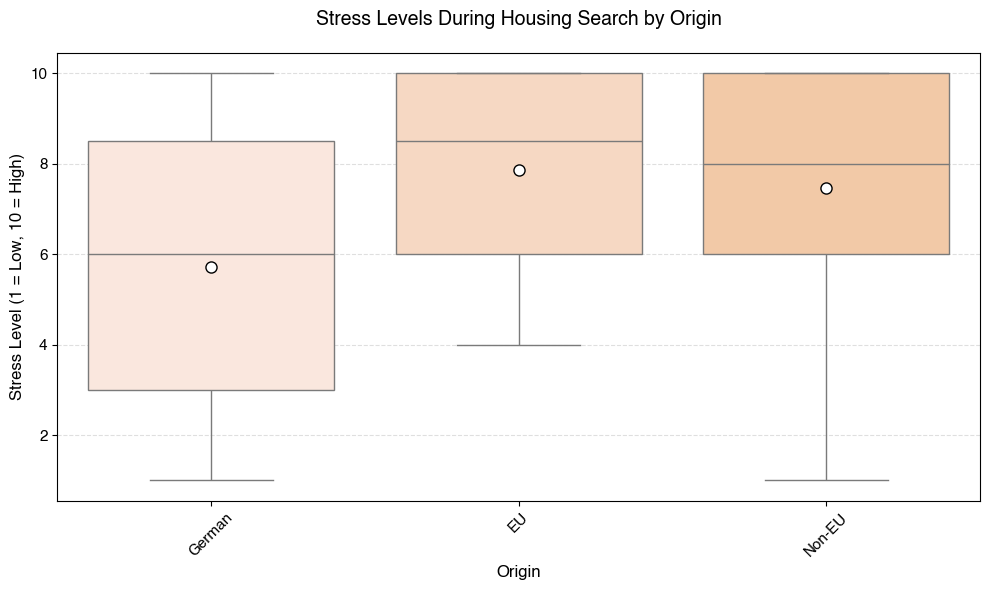

In [62]:
# Define expected categories (for ordering)
orign_categories = ['German', 'EU', 'Non-EU']

# Create exploded version from origin column
plot_df = df.explode('origin')[['origin', 'stress']].dropna()

# Standardize any remaining values to 'Other'
plot_df['origin'] = plot_df['origin'].apply(
    lambda x: x if x in orign_categories else 'Other'
)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=plot_df,
    x='origin',
    y='stress',
    order=orign_categories,
    palette=colors,
    showmeans=True,
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': '8'
    }
)

# Formatting
plt.title('Stress Levels During Housing Search by Origin', 
          fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Stress Level (1 = Low, 10 = High)', fontsize=12)
plt.xlabel('Origin', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

save_path = os.path.join(hf, "Stress Levels During Housing Search by Origin.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

*Figure XX. Stress Levels During Housing Search by Origin*

Неопределённость, постоянные отказы и страх остаться без жилья напрямую влияют на психическое состояние и академическую адаптацию. Один из участников прямо связывает жилищный кризис с депрессивным состоянием: `It was kind of difficult and to be honest scary because of new country.`
Другой студент подчёркивает, что стресс достиг такого уровня, что потребовалась профессиональная помощь: `I was really very depressed, but I took the therapy at the TU.` Таким образом, жилищная нестабильность становится не временной трудностью, а фактором, напрямую влияющим на благополучие и способность студентов учиться и интегрироваться.

## Searching Time 

The distribution of searching time (Figure XX) demonstrates the high heterogeneity of student experiences and highlights the structural tension in the market. For the largest share of respondents, the search took between 1 and 3 months (35.0%), which indicates a relatively ‘standard’ scenario, requiring, nevertheless, significant time and emotional resources. Another 27.2% of students were able to find accommodation in less than a month, which is probably due to a combination of favorable market conditions and an increased budget.

At the same time, almost one in five students (21.4%) searched for accommodation for more than six months, and another 16.5% searched for 3 to 6 months. Taken together, this means that more than a third of respondents faced a protracted and problematic search that went beyond one semester. Such long search periods directly correlate with increased stress and housing instability and point to a systemic shortage of affordable and long-term student housing in Berlin, as well as a general lack of transparency in the search process.

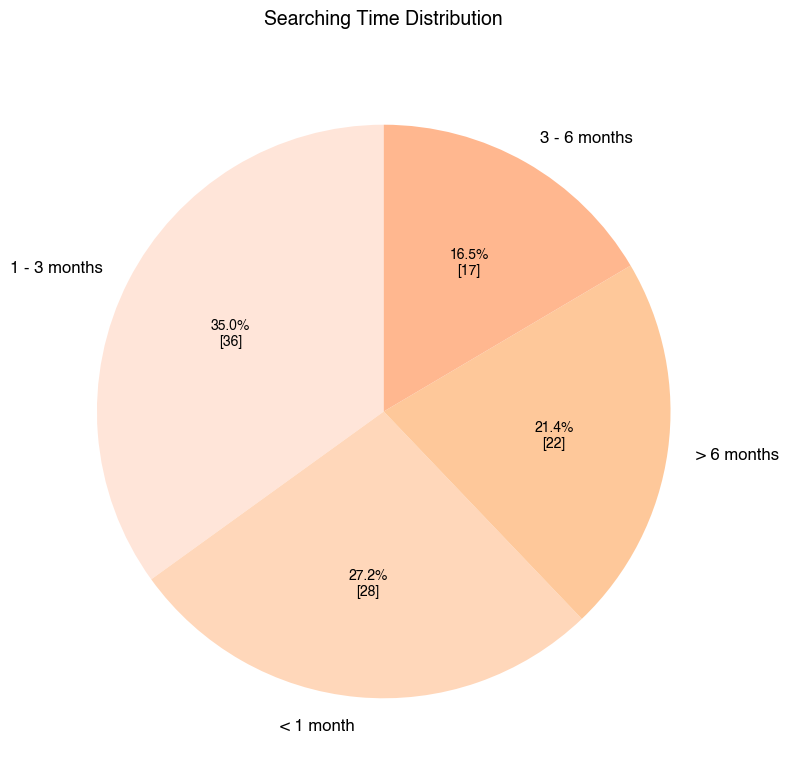

In [63]:
plot_pie_chart("term", title="Searching Time Distribution")

*Figure XX. Searching Time Distribution*

## Applications Count

The application count distribution diagram (Figure XX) clearly reflects the scale of competition in the student housing market in Berlin and the efforts that students have to make in their search.

The largest group of respondents (35.9%) submitted between 1 and 5 applications, which is typically characteristic of students who managed to find accommodation relatively quickly — most often through acquaintances, university channels or state-run student halls of residence. Another 16.5% submitted between 6 and 15 applications, which may also indicate relatively favorable search conditions or a lucky coincidence in terms of timing and budget.

At the same time, almost half of the survey participants reported a significantly higher level of search effort. About 14.6% of students submitted 16–30 applications, and the same number submitted 31–50 applications. It is particularly noteworthy that 18.5% of respondents submitted more than 50 applications, including 10.7% who submitted more than 100 applications. These figures indicate a high degree of frustration, a prolonged search and a systemic shortage of available housing options.

Thus, the distribution of applications highlights the polarisation of the search experience: some students find accommodation relatively quickly, while for a significant proportion, the search becomes a protracted and time-consuming process. Combined with high levels of stress, this confirms the existence of a structural imbalance between supply and demand in the student housing market in Berlin.

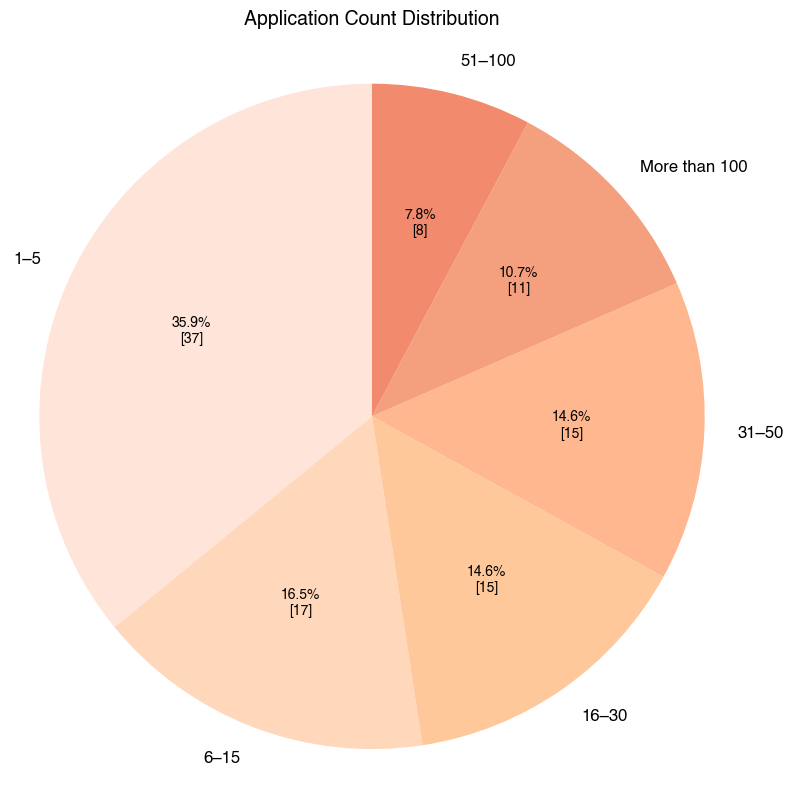

In [64]:
plot_pie_chart("applic_count", title="Application Count Distribution")

*Figure XX. Application Count Distribution*

## Short Term Agreement

Almost a quarter of students (24.3%) do not have a long-term rental contract for a period of one year or more throughout their studies (Figure XX). Given that the duration of studies can range from 2 to 6 years, this means that a significant proportion of students have to repeatedly search for accommodation, facing recurring stress, uncertainty, and additional financial costs.

Against this backdrop, state-run student halls of residence remain the most stable and reliable landlords. They usually offer one-year contracts with the possibility of renewal, providing basic housing security and predictability of living conditions. However, the limited capacity of such accommodations significantly reduces their systemic role and does not compensate for the instability characteristic of the private segment of the student housing market.

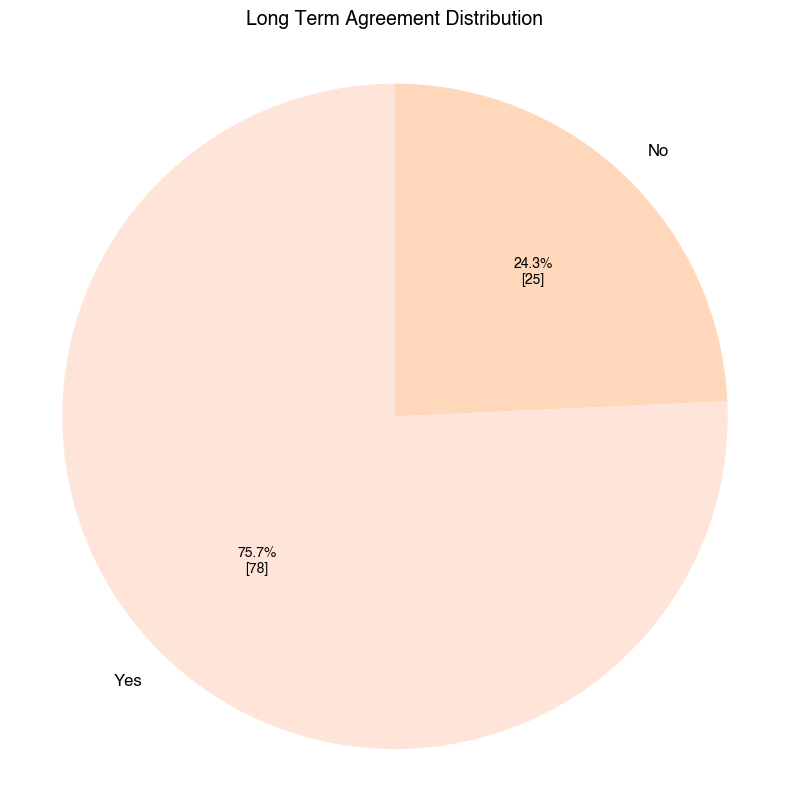

In [65]:
plot_pie_chart("longtermagree", title="Long Term Agreement Distribution") 

*Figure XX. Long Term Agreement Distribution*

## No Anmeldung

The lack of a long-term rental agreement is directly linked to the issue of registering at the place of residence (Anmeldung), which, in turn, is a mandatory condition for extending visas and residence permits in Germany. Several survey participants who did not have a long-term contract indicated that they had to pay extra to register their residence or register at the address of acquaintances, which indicates the prevalence of informal and legally vulnerable practices in the student housing market.

In addition, the absence of a long-term contract often indicates subletting or re-renting from previous tenants. This practice is usually accompanied by higher rents and, at the same time, deprives students of the right to official registration. This creates a vicious circle of housing instability, in which short-term rentals increase financial pressure, legal insecurity and administrative risks, especially for international students.

НSeveral participants indicated that the possibility of registration was promised before signing the contract, but later turned out to be impossible due to illegal subletting. This creates serious legal and administrative risks: `Before signing the contract, I was told that Anmeldung would be possible, and afterwards the landlord told us that it isn't`. In one interview, the situation is described as a vicious circle: `You need papers to get an Anmeldung, and you need an Anmeldung before you can apply for your residence permit`. 

Many students are forced to live without official registration or use old addresses, which creates a chain of further problems — from renewing their residence permits to accessing public services. Anmeldung is transformed from a basic administrative procedure into a tool of pressure and control by landlords.

## Hidden Costs

In addition to high rents, students regularly encounter hidden and non-transparent costs that significantly increase the actual cost of living and make housing less affordable than advertised. These costs include high deposits, additional payments for utilities, furniture, and internet, as well as administrative fees and agency services.

The search for housing takes place in parallel with the start of studies, adaptation to a new country and, in some cases, a lack of social and financial support. One respondent sums up the general mood as follows: `The entire system is screwed. Students who don't have financial support from their families have it especially rough`.

## Scams

Housing shortages and high competition make students particularly vulnerable to fraud in the rental market. Interviews show that some respondents lost significant amounts of money due to fake advertisements, fictitious landlords, or requests to transfer a deposit before viewing the property. 

One of the most dangerous and financially painful types of fraud in the rental market involves fake offers and advance deposit payments, where the victim is told that a flat has been found and that a deposit (Kaution) must be transferred before meeting or signing the contract. This happened to one participant in the study, who noted: `That's how 300 other people lost 2000 euros of deposit...` The scheme involves the prospective tenant transferring a significant amount of money as a deposit or advance payment, waiting for the keys and confirmation of the transaction, but after the transfer, contact with the ‘landlord’ is lost and they disappear. This is a typical sign of a rental scam — the scammer creates the appearance of legitimacy, but has no right to rent out the property, and the transferred funds become non-refundable.

When time is short and there aren't many options, students often have to make quick decisions, which makes it harder for them to think critically about the risks. International students who are outside Germany or aren't familiar with local laws and market conditions are especially vulnerable. The fear of being left without accommodation leads to unsafe decisions, including temporary accommodation without a contract or in illegal conditions. In this context, fraud is not a separate problem, but a direct consequence of the structural crisis in student housing, in which the shortage and asymmetry of information systematically work against students.

## Discrimination

Although more than half of respondents formally stated that they had not encountered direct discrimination (Figure XX), qualitative interviews show that discrimination often takes hidden and institutionalised forms. The most common practices are ignoring applications, failing to respond, and rejecting applications without explanation. One student emphasises: `Haven't encountered direct discrimination, rather landlords ignore applications`. Such “invisible discrimination” is particularly characteristic of an overheated market, where refusal does not require justification but systematically affects students, foreigners and people with diverse social profiles.

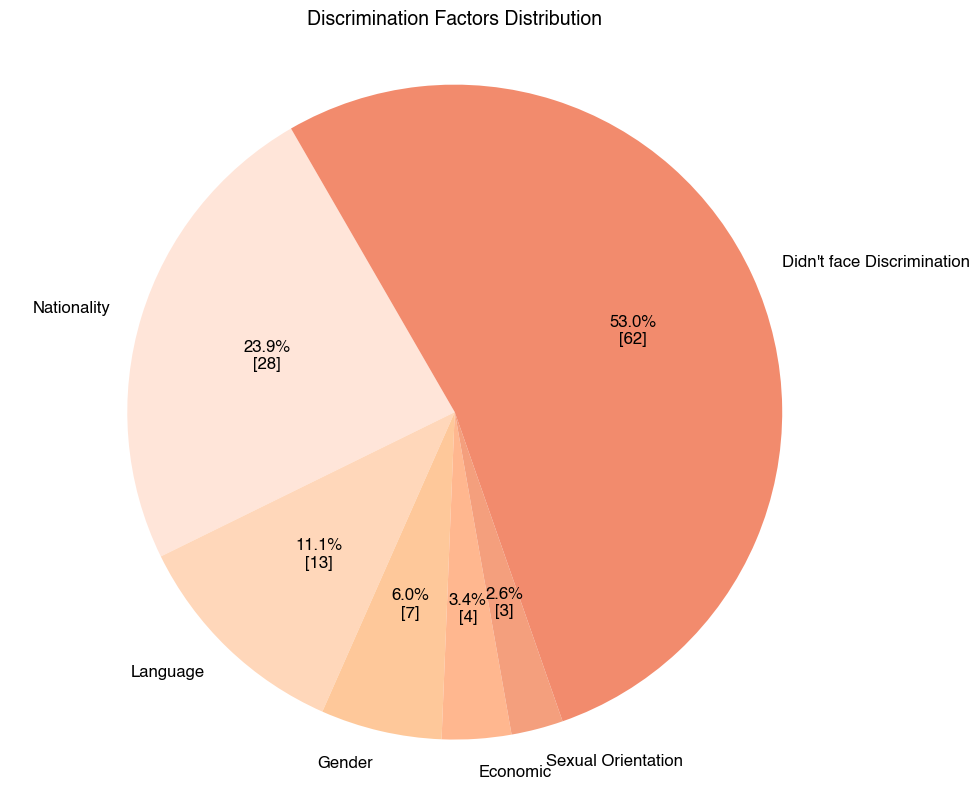

In [66]:
# Dedisce discancing categories
disc_categories = ['Nationality', 'Language', 'Gender', 'Economic', 'Sexual Orientation']

colors = ["#FFE5D9", "#FFD7BA", "#FEC89A", "#FFB78F", "#F49F7D", "#F28B6D", "#E1755CFF"]

# Create an empty counter
disc_counts = {cat: 0 for cat in disc_categories}
disc_counts['Didn\'t face Discrimination'] = 0

# Count occurrences (handling multiple answers per student)
for entry in df['discrimination_e'].dropna():
    # Convert to lowercase and split multiple answers
    entries = [e.strip().lower() for e in str(entry).split(',')]
    matched = False
    for cat in disc_categories:
        if any(cat.lower() in e for e in entries):
            disc_counts[cat] += 1
            matched = True
    if not matched and entries:  # Only count as 'Other' if non-empty
        disc_counts['Didn\'t face Discrimination'] += 1

# Convert to DataFrame for plotting
disc_df = pd.DataFrame(list(disc_counts.items()), columns=['Source', 'Count'])

# Dedisce autopct function with access to counts
def make_autopct(values):
    total = sum(values)
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n[{count}]"
    return my_autopct

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(disc_df['Count'], 
        labels=disc_df['Source'], 
        autopct=make_autopct(disc_df['Count']),
        startangle=120, 
        colors=colors[:len(disc_counts)],
        textprops={'fontsize': 12})
plt.title('Discrimination Factors Distribution', 
          fontsize=14, weight='bold', pad=20)
plt.axis('equal')

save_path = os.path.join(hf, "Discrimination Factors Distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

*Figure XX. Discrimination Factors Distribution*

Discrimination is most evident on the basis of nationality and origin, as confirmed by both quantitative data and interviews. Some respondents encountered outright refusals related to their citizenship or name: `I don't get a lot of replies to be honest, I’m assuming that the reason behind it may be me being a student and my non-German name`, while another participant notes: `Actually, you can really see how important a German surname can sometimes be when competing for accommodation`. In some cases, discrimination is explicit, such as refusing to accept students of a certain nationality: `Due to today’s situation, the landlord decided not take Russian students`. These examples highlight the vulnerability of international students in the absence of transparent control mechanisms. 

Financial discrimination is another key barrier and is closely linked to student status. Many landlords and housing companies require proof of income at a level that is unaffordable for most students: `Many housing companies require proof of income and require you to make at least three times the monthly rent, which is entirely unattainable for most students`. As a result, housing is effectively reserved for working professionals, while students are systematically excluded from the market: `Apartments only for people with work contracts.` This is particularly painful for foreign students who cannot provide German guarantors or credit history (Schufa).

A separate and particularly vulnerable group are students who face discrimination on the basis of gender, family status and queer identity. One interviewee describes being denied a rental because of their ‘non-traditional’ family configuration: `Another agent denied our application because we are an alternative family configuration and not a straight couple`. Others mention advertisements with strict restrictions: `Women only, no LGBT`, which directly excludes certain groups from the housing market. The inevitable consequence of such discrimination is a retreat into the grey area of renting, accompanied by risks and exploitation: `I had to live in flats without contracts, hiding from the Hausverwaltung, creating a very stressful power struggle`.

Taken together, this evidence shows that discrimination in the student housing sector is rarely an isolated or purely interpersonal phenomenon. Rather, it is embedded in the structure of a market where competition, scarcity and excessive requirements legitimise the exclusion of students, particularly international and socially vulnerable groups. 

# Key Findings

The housing crisis in Berlin has a systemic and multi-level impact on students' lives, significantly limiting their choices and undermining their sense of stability. High prices and intense competition dramatically narrow the range of available options, making even minimally acceptable housing difficult to obtain. Many students note that there are virtually no affordable options on the market that are specifically tailored to their needs: `nothing affordable for students` or `fewer flats, more competition`. In this situation, housing ceases to be a matter of preference and becomes a matter of survival.

As a result, students are forced to lower their expectations and settle for inadequate or temporary solutions. Some remain in dormitories with outdated facilities and a lack of privacy, as alternatives are financially unattainable: `I’m stuck with my affordable dormitory option with older amenities and a lack of privacy`. Others consider moving to neighbouring cities or the suburbs, which increases the time and cost of daily commutes: `Flats are expensive and/or in districts not suitable for my daily living`. Thus, the crisis directly affects students' spatial mobility and their daily organisation of life.

The crisis has a particularly acute impact on students' psychological and emotional state. The search for housing is described as an exhausting and demanding process that takes priority over studying and social life. Respondents emphasise that they had to spend several hours a day exclusively on searching, often without any results: `It was very stressful and time-consuming. I couldn't do much else besides search for an apartment`. For some, this situation becomes almost unbearable: `Not yet, but soon it will break me`, which indicates the risk of long-term emotional exhaustion.

Overall, the results show that the housing crisis creates an atmosphere of constant instability and forced gratitude for minimally acceptable conditions. Even those students who have managed to find accommodation realise that they were simply lucky, rather than that the system works effectively: `I was lucky, but just a couple of months later it was almost impossible to find a room`. Awareness of the shortage and lack of alternatives forces students to give up actively searching in advance and rely entirely on student dormitories as the only realistic option. This highlights the structural nature of the crisis and its long-term consequences for the student population, especially those who do not have financial support or social connections.